In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle

In [3]:
normal_data = pd.read_csv('Normal.csv')
vulnerable_data = pd.read_csv('vulnerable.csv')

In [5]:
normal_data_info = normal_data.info()
vulnerable_data_info = vulnerable_data.info()

normal_data_head = normal_data.head()
vulnerable_data_head = vulnerable_data.head()
normal_data_info, normal_data_head, vulnerable_data_info, vulnerable_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      1409 non-null   int64  
 1   Speed     1409 non-null   float64
 2   Throttle  1409 non-null   float64
 3   Brake     1409 non-null   float64
 4   Steer     1409 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 55.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      494 non-null    int64  
 1   Speed     494 non-null    float64
 2   Throttle  494 non-null    float64
 3   Brake     494 non-null    float64
 4   Steer     494 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.4 KB


(None,
          Time      Speed  Throttle  Brake     Steer
 0  1724219921   8.276332      0.85    0.0 -0.109032
 1  1724219921   1.799324      0.85    0.0 -0.109077
 2  1724219921   5.369393      0.85    0.0 -0.108304
 3  1724219921  11.429178      0.85    0.0 -0.241198
 4  1724219922  15.914785      0.85    0.0 -0.166284,
 None,
          Time      Speed  Throttle  Brake     Steer
 0  1724241164   1.806862      0.00    0.0  0.000000
 1  1724241164   1.806862      0.00    0.0  0.000000
 2  1724241164   1.806862      0.00    0.0  0.000000
 3  1724241164   1.806862      0.00    0.0  0.000000
 4  1724241166  19.602984      0.85    0.0  0.001132)

In [7]:
normal_data['Label'] = 'Normal'
vulnerable_data['Label'] = 'Vulnerable'

combined_data = pd.concat([normal_data, vulnerable_data], ignore_index=True)
combined_data['Label'] = combined_data['Label'].map({'Normal': 0, 'Vulnerable': 1})
X = combined_data.drop(columns=['Label', 'Time'])  
y = combined_data['Label']
combined_data.shape, X.head(), y.head()

((1903, 6),
        Speed  Throttle  Brake     Steer
 0   8.276332      0.85    0.0 -0.109032
 1   1.799324      0.85    0.0 -0.109077
 2   5.369393      0.85    0.0 -0.108304
 3  11.429178      0.85    0.0 -0.241198
 4  15.914785      0.85    0.0 -0.166284,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Label, dtype: int64)

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
history = {'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': []}
epochs = 10
for epoch in range(epochs):
    # Fit the model
    rf_model.fit(X_train, y_train)

    # Training accuracy and validation accuracy
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_test_pred)

    # Simulated loss as 1 - accuracy
    train_loss = 1 - train_acc
    val_loss = 1 - val_acc

    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)

# Plot Accuracy and Loss Curves
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(14, 5))


<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

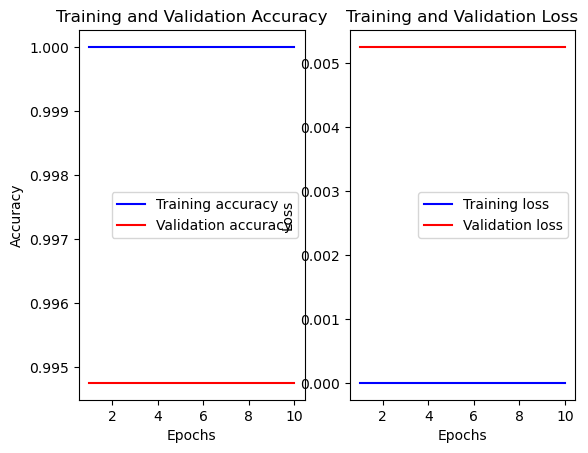

In [13]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history['train_acc'], 'b', label='Training accuracy')
plt.plot(epochs_range, history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history['train_loss'], 'b', label='Training loss')
plt.plot(epochs_range, history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.994750656167979

Confusion Matrix:
 [[269   2]
 [  0 110]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       271
           1       0.98      1.00      0.99       110

    accuracy                           0.99       381
   macro avg       0.99      1.00      0.99       381
weighted avg       0.99      0.99      0.99       381



In [21]:
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy

0.994750656167979

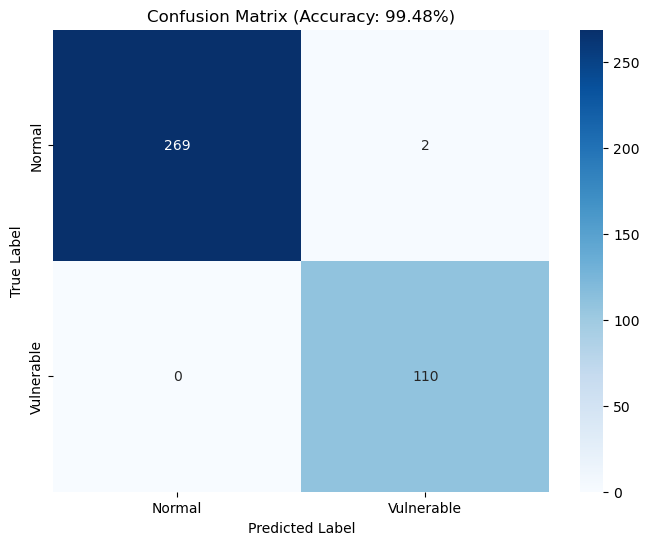

Accuracy: 99.48%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       271
           1       0.98      1.00      0.99       110

    accuracy                           0.99       381
   macro avg       0.99      1.00      0.99       381
weighted avg       0.99      0.99      0.99       381



In [25]:

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Vulnerable"], yticklabels=["Normal", "Vulnerable"])
plt.title(f"Confusion Matrix (Accuracy: {accuracy*100:.2f}%)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print(f"Accuracy: {accuracy*100:.2f}%")
print("Classification Report:")
print(class_report)

In [27]:
def predict_new_data(new_data):
    new_data_df = pd.DataFrame(new_data)
    predictions = rf_model.predict(new_data_df)
    
    label_mapping = {0: 'Normal', 1: 'Vulnerable'}
    predicted_labels = [label_mapping[pred] for pred in predictions]
    
    return predicted_labels
new_data_example = [
    {"Speed": 29.302, "Throttle": 0.2791, "Brake": 0, "Steer": 0.000176},  
    {"Speed": 29.3058, "Throttle": 0.2791, "Brake": 0, "Steer": 0} 
]

predictions = predict_new_data(new_data_example)
print(predictions)


['Normal', 'Normal']


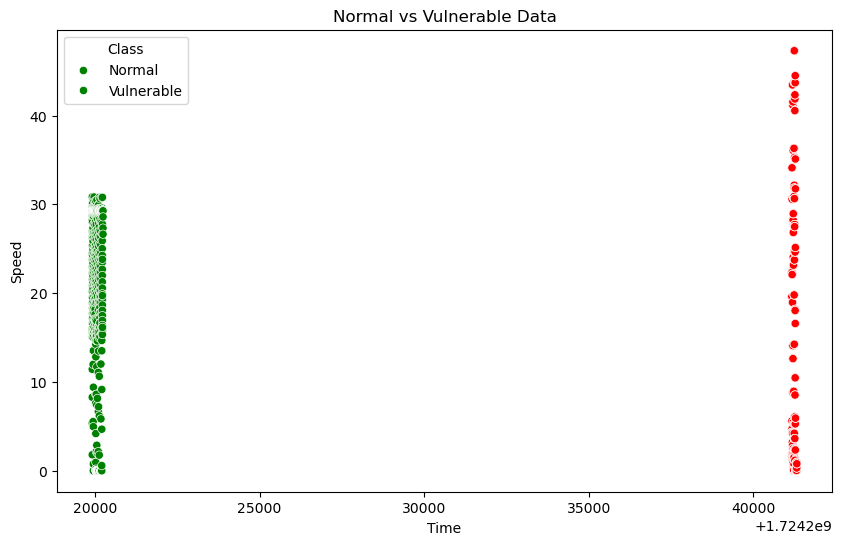

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x=combined_data.columns[0], y=combined_data.columns[1], hue="Label", palette=["green", "red"])

plt.title('Normal vs Vulnerable Data')
plt.xlabel(combined_data.columns[0])  
plt.ylabel(combined_data.columns[1])  
plt.legend(title="Class", labels=['Normal', 'Vulnerable'])

plt.show()


C:\Users\pavithra\AppData\Local\Temp\ipykernel_18716\1179596552.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


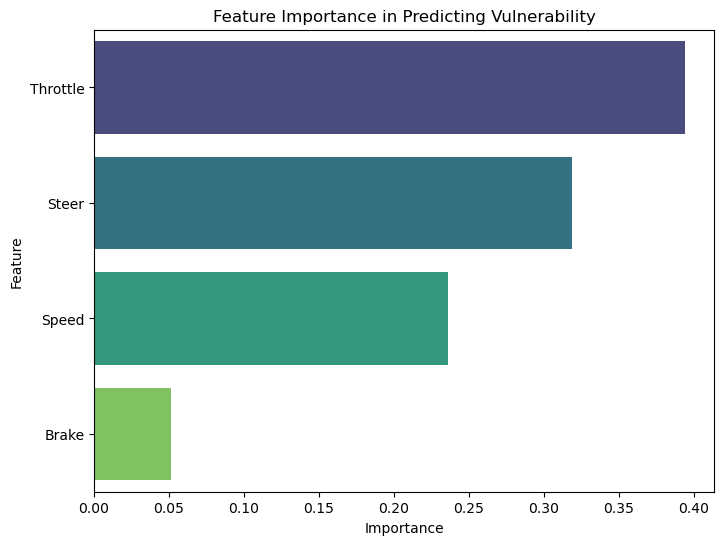

    Feature  Importance
1  Throttle    0.393786
3     Steer    0.318925
0     Speed    0.236199
2     Brake    0.051091


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Get the feature importances
feature_importances = rf_model.feature_importances_

# Step 2: Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Plot the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importance in Predicting Vulnerability')
plt.show()

# Display the feature importance values
print(feature_importance_df)
